In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from math import pi

In [2]:
train = pd.read_csv('/home/joaquin/Desktop/Datos/tp1/clean_train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
train.duplicated().sum()

0

In [4]:
train.isnull().sum()

id             0
keyword       61
location    2482
text           0
target         0
dtype: int64

In [5]:
train['character_count'] = train['text'].str.len()
train['mean_word_length'] = train['text'].apply(lambda x: (sum(len(w) for w in str(x).split()) / len(str(x).split())))
train['punctuation_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
train.head()

,id,keyword,location,text,target,character_count,mean_word_length,punctuation_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,4.384615,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,4.571429,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,5.090909,3
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,7.125000,2
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,4.500000,2


In [6]:
train.describe()

,id,target,character_count,mean_word_length,punctuation_count
count,7503.000000,7503.000000,7503.000000,7503.000000,7503.000000
mean,5445.988671,0.425963,100.880581,6.130105,6.842863
std,3143.903044,0.494521,33.819457,1.677519,4.606796
min,1.000000,0.000000,7.000000,2.250000,0.000000
25%,2728.500000,0.000000,77.000000,4.875000,3.000000
50%,5417.000000,0.000000,107.000000,5.941176,6.000000
75%,8160.000000,1.000000,133.000000,7.058824,10.000000
max,10873.000000,1.000000,157.000000,19.333333,61.000000


In [7]:
#calculo las medias de estos valores
train_means = train.groupby(['target']).agg({'character_count':['mean'],'mean_word_length':['mean',],'punctuation_count':['mean']})
train_means.columns = train_means.columns.get_level_values(0) + '_' + train_means.columns.get_level_values(1)
train_means.head()

,character_count_mean,mean_word_length_mean,punctuation_count_mean
target,,,
0,95.581611,5.874892,6.310193
1,108.021589,6.474035,7.560701


In [8]:
categories = train_means.columns.get_level_values(0).tolist()
categories

['character_count_mean', 'mean_word_length_mean', 'punctuation_count_mean']

In [9]:
disaster_means = train_means.loc[1].values.tolist()
non_disaster_means = train_means.loc[0].values.tolist()
disaster_means
non_disaster_means

[95.58161133039239, 5.874892080046524, 6.310192709542605]

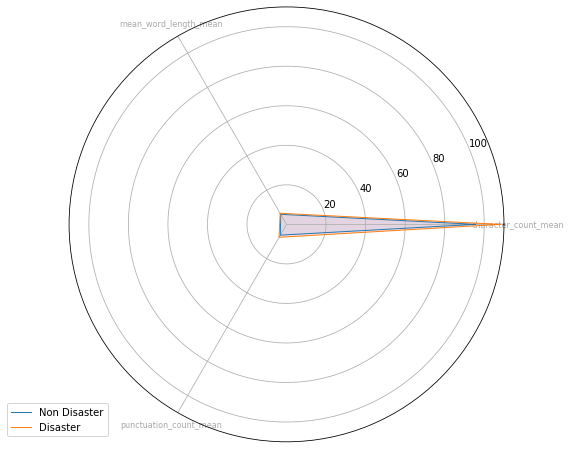

In [10]:
#ploteo un radar chart
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), subplot_kw=dict(polar=True))
#ax.set_rgrids([20, 40, 60, 80])

plt.xticks(angles[:-1], categories, color='darkgrey', size=8)
plt.ylim(0, 110)

val_c1 = non_disaster_means
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1, linestyle='solid', label='Non Disaster')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)
 
val_c2 = disaster_means
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1, linestyle='solid', label='Disaster')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

#dudo que me sirva ya que las magnitudes del character count son mucho mas grandes que las de las otras dos variables

Text(0, 0.5, 'Density')

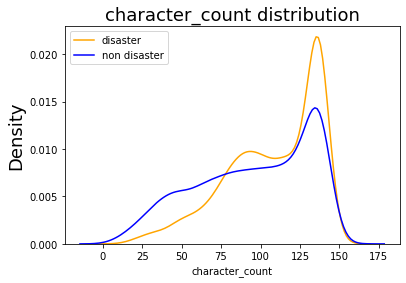

In [13]:
g = sns.distplot(train[train['target'] == 1]['character_count'], color = 'orange', label = 'disaster', hist=False)
g = sns.distplot(train[train['target'] == 0]['character_count'], color = 'blue', label = 'non disaster', hist=False)
g.set_title("character_count distribution", fontsize=18)
g.set_ylabel("Density", fontsize=18)

In [14]:
#el character count de los disaster tweets parece ser mas alto
#los non disaster tienen una densidad mas alta solo hasta los 75 caracteres, de ahi en adelante la densidad de los disaster tweets es mayor


Text(0, 0.5, 'Density')

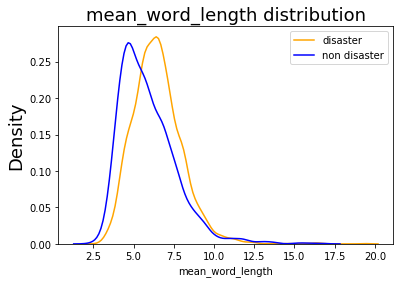

In [15]:
g = sns.distplot(train[train['target'] == 1]['mean_word_length'], color = 'orange', label = 'disaster', hist=False)
g = sns.distplot(train[train['target'] == 0]['mean_word_length'], color = 'blue', label = 'non disaster', hist=False)
g.set_title("mean_word_length distribution", fontsize=18)
g.set_ylabel("Density", fontsize=18)

In [9]:
#Denuevo los disaster tweets tienen maor densidad en los valores mas altos (a partir del 5.0 aproximadamente)

Text(0, 0.5, 'Density')

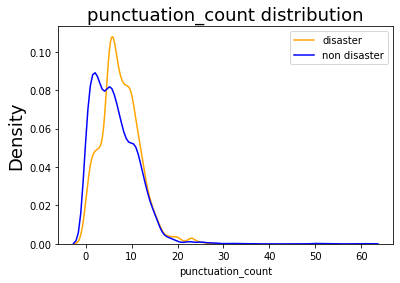

In [16]:
g = sns.distplot(train[train['target'] == 1]['punctuation_count'], color = 'orange', label = 'disaster', hist=False)
g = sns.distplot(train[train['target'] == 0]['punctuation_count'], color = 'blue', label = 'non disaster', hist=False)
g.set_title("punctuation_count distribution", fontsize=18)
g.set_ylabel("Density", fontsize=18)

In [12]:
#nos encontramos con lo mismo, esta vez a partir del 7 aproximadamente

Text(0.5, 1.0, 'Mean Word Length vs. Punctuation Count')

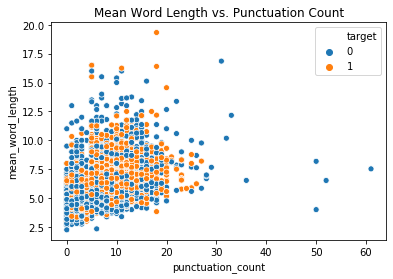

In [17]:
g = sns.scatterplot(x='punctuation_count', y='mean_word_length', data = train, hue= 'target')
g.set_title('Mean Word Length vs. Punctuation Count')

In [ ]:
#los disaster tweets se muestran mas acotados en los dos ejes, tienden a tener punctuation count maor a 5 y mean 
#word length mayor a 4 aproximadamente

#los non disaster parecen estar mas distribuidos pero lo que importa remarcar creo que es que los non disaster
#a valores mas bajos

Text(0.5, 1.0, 'Mean Word Length vs. Character Count')

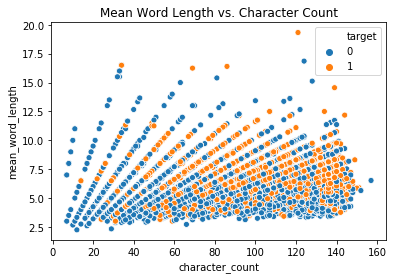

In [18]:
g = sns.scatterplot(x='character_count', y='mean_word_length', data = train, hue='target')
g.set_title('Mean Word Length vs. Character Count')

In [15]:
#en este se puede ver que los disaster tweets tienden a estar concentrados entre los 70 caracteres y los 140
#y desde los 5 mean_word_length hasta los 10

#mientras que los non disaster se muestran un poco mas distribuidos con respecto a la cantidad de caracteres y 
#tienden a tener un mean_word_length mas bajo, entre el 2.5 y el 5

#ademas se puede ver que se arma un patron lineal en determinadas partes del grafico, donde el character 
#count parece aumentar con el mean_word_length

#aca se ve que los non disaster parecen estar acumulados en un colchon horizontal comprendido entre aproximadamente
#un mean_word_length entre 2.5 y 5, y un character_count que abarca casi todos los valores posibles del eje x
#esto vendría a indicar que a pesar de los tweets con palabras mas cortas tienen mayor tendencia a ser non disaster,
#indiferentemente a la longitud del texto (un texto muy largo con palabras cortas es probable que tenga lenguahje
#muy básico)



Text(0.5, 1.0, 'Character Count vs. Punctuation Count')

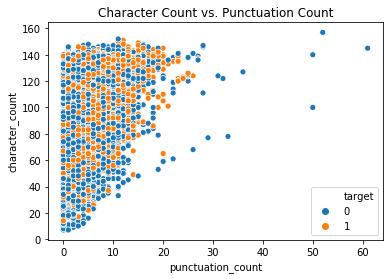

In [19]:
g = sns.scatterplot(x='punctuation_count', y='character_count', data = train, hue='target')
g.set_title('Character Count vs. Punctuation Count')

In [17]:
#Denuevo los non disaster tienden a valores mas bajos
#se puede ver aca que mientras aumenta el punctuation con una baja cantidad de puntuacion hay muchos tweets falsos
#(hasta con alta cantidad de caracteres) esto tiene sentido, a que un tweet muy largo, con poca puntuacion tiene
#lógicamente más probabilidades de estar mal escrito

In [20]:
grouped=train.groupby(['target'])#Calcular la mean character count

In [21]:
grouped=train.groupby(['target']).agg(['count'])
grouped = grouped[('id','count')].to_frame()
grouped.columns=['count']
grouped.head()

,count
target,
0,4307
1,3196


[Text(0.5, 1.0, 'target vs non target distribution')]

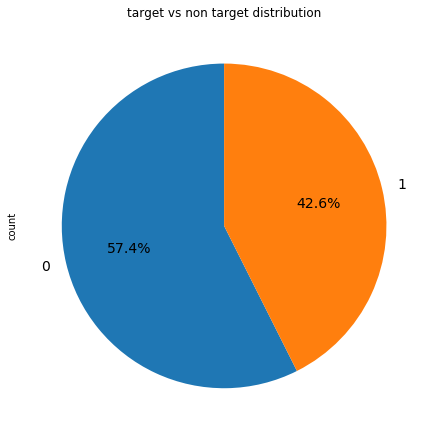

In [22]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(121, aspect='equal')
g = grouped.plot(kind='pie', y = 'count', ax = ax1, autopct='%1.1f%%', startangle=90, shadow=False, legend=False, fontsize=14)
ax1.set(title = 'target vs non target distribution')

In [23]:
train_MWL_lt_5 = train[train.mean_word_length < 5]
train_MWL_lt_5.head()

,id,keyword,location,text,target,character_count,mean_word_length,punctuation_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,4.384615,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,4.571429,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,4.500000,2
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59,3.000000,4
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52,4.300000,4


In [82]:
grouped_MWL=train_MWL_lt_5.groupby(['target']).agg(['count'])
grouped_MWL = grouped_MWL[('id','count')].to_frame()
grouped_MWL.columns=['count']
grouped_MWL['percentage'] = round(grouped_MWL['count']/train_MWL_lt_5['id'].count() * 100, 1)
grouped_MWL.head()

,count,percentage
target,,
0,1533,75.6
1,494,24.4


[Text(0.5, 1.0, 'target vs non target distribution(mean word length < 5)')]

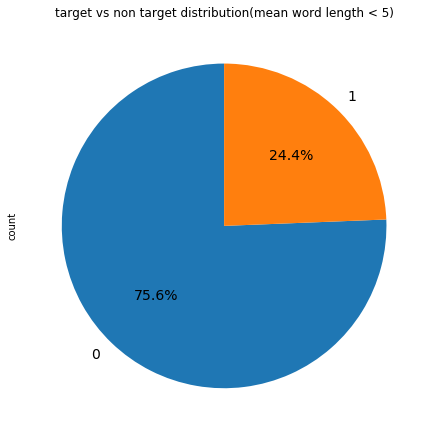

In [83]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(121, aspect='equal')
g = grouped_MWL.plot(kind='pie', y = 'count', ax = ax1, autopct='%1.1f%%', startangle=90, shadow=False, legend=False, fontsize=14)
ax1.set(title = 'target vs non target distribution(mean word length < 5)')

In [50]:
#el porcentaje de Disaster tweets disminuye significativamente

In [26]:
train_PC_lt_5 = train[train.punctuation_count < 5]
train_PC_lt_5.head()

,id,keyword,location,text,target,character_count,mean_word_length,punctuation_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,4.384615,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,4.571429,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,5.090909,3
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,7.125000,2
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,4.500000,2


In [87]:
grouped_PC=train_PC_lt_5.groupby(['target']).agg(['count'])
grouped_PC = grouped_PC[('id','count')].to_frame()
grouped_PC.columns=['count']
grouped_PC['percentage'] = round(grouped_PC['count']/train_PC_lt_5['id'].count() * 100, 1)
grouped_PC.head()

,count,percentage
target,,
0,1739,71.9
1,679,28.1


[Text(0.5, 1.0, 'target vs non target distribution(punctuation count < 5)')]

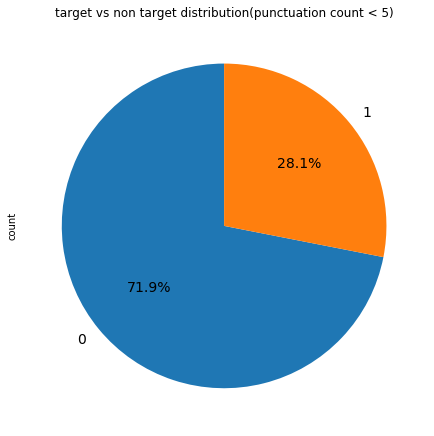

In [86]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(121, aspect='equal')
g = grouped_PC.plot(kind='pie', y = 'count', ax = ax1, autopct='%1.1f%%', startangle=90, shadow=False, legend=False, fontsize=14)
ax1.set(title = 'target vs non target distribution(punctuation count < 5)')

In [29]:
#nos encontramos con resultados mu parecidos

In [30]:
train_CC_lt_75 = train[train.character_count < 75]
train_CC_lt_75.head()

,id,keyword,location,text,target,character_count,mean_word_length,punctuation_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,4.384615,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,4.571429,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,7.125000,2
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59,3.000000,4
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52,4.300000,4


In [88]:
grouped_CC=train_CC_lt_75.groupby(['target']).agg(['count'])
grouped_CC = grouped_CC[('id','count')].to_frame()
grouped_CC.columns=['count']
grouped_CC['percentage'] = round(grouped_CC['count']/train_CC_lt_75['id'].count() * 100, 1)
grouped_CC.head()

,count,percentage
target,,
0,1282,74.1
1,447,25.9


[Text(0.5, 1.0, 'target vs non target distribution(character count < 75)')]

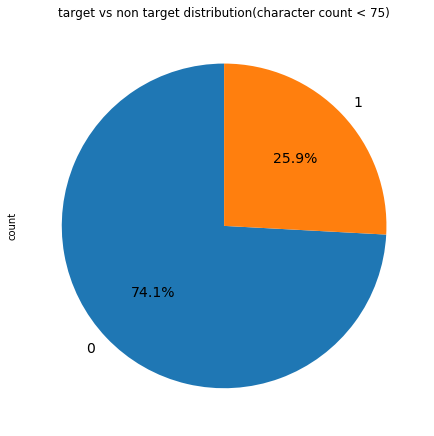

In [89]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(121, aspect='equal')
g = grouped_CC.plot(kind='pie', y = 'count', ax = ax1, autopct='%1.1f%%', startangle=90, shadow=False, legend=False, fontsize=14)
ax1.set(title = 'target vs non target distribution(character count < 75)')

In [33]:
#obtenemos un resultado mu similar nuevamente
#se puede ineferir que a debajo de ciertos valores valores en estas 3 columnas, las chances de que el tweet no
#sea disaster aumentan

#chances de encontrar un disaster
# - character count < 75: 0,259
# - punct count < 5: 0,259
# - mean word length < 5: 0,244
# si un tweet cumple estos 3 requisitos, las chances de que sea disaster serian 0.016367764. Extremadamente bajas

In [61]:
list(grouped_MWL['count'])

[1533, 494]

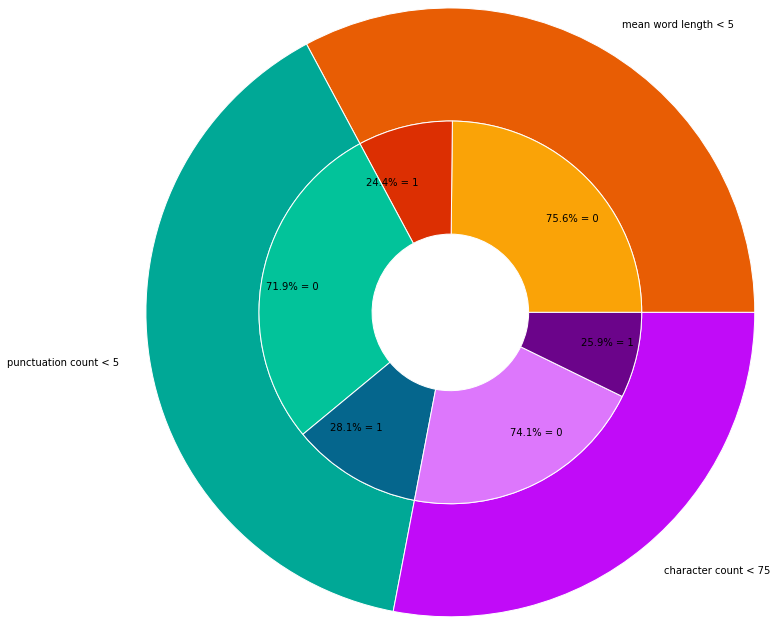

In [123]:
#Busco sintetizar estos tres pie charts en un nested pie chart

fig, ax = plt.subplots()
ax.axis('equal')
width = 1.3

valsout = [train_MWL_lt_5['id'].count(),train_PC_lt_5['id'].count(),train_CC_lt_75['id'].count()]

cm = plt.get_cmap("tab20c")
cout = ['#e85d04','#00a896','#C10BF8']

pie,_ = ax.pie(valsout,radius=3.5, labels=['mean word length < 5', 'punctuation count < 5', 'character count < 75'],
        colors = cout)
plt.setp(pie,width=width, edgecolor='white')

list_MWL_count = list(grouped_MWL['count'])
list_PC_count = list(grouped_PC['count'])
list_CC_count = list(grouped_CC['count'])

list_MWL_perc = list(grouped_MWL['percentage'])
list_PC_perc = list(grouped_PC['percentage'])
list_CC_perc = list(grouped_CC['percentage'])

valsin = [list_MWL_count[0], list_MWL_count[1], list_PC_count[0], list_PC_count[1], list_CC_count[0], list_CC_count[1]]
labelsin =[
    str(list_MWL_perc[0]) + '% = 0',
    str(list_MWL_perc[1]) + '% = 1',
    str(list_PC_perc[0]) + '% = 0',
    str(list_PC_perc[1]) + '% = 1',
    str(list_CC_perc[0]) + '% = 0',
    str(list_CC_perc[1]) + '% = 1'
]

cin = ['#faa307','#dc2f02','#02c39a','#05668d','#DD77FC','#6B048A']
pie2, _ = ax.pie(valsin, 
                radius= 3.5-width,
                labels=labelsin, 
                labeldistance=0.7,
                colors=cin)

plt.setp(pie2,width=width,edgecolor='white')
plt.show()

In [34]:
train_PC_lt_5_and_CC_gt_75 = train_PC_lt_5[train_PC_lt_5.character_count > 75]
train_PC_lt_5_and_CC_gt_75.head()

,id,keyword,location,text,target,character_count,mean_word_length,punctuation_count
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,5.090909,3
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,4.500000,2
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95,5.857143,3
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79,5.666667,1
11,17,NaN,NaN,Haha South Tampa is getting flooded hah- WAIT ...,1,129,3.814815,2


In [35]:
grouped_PC_CC=train_PC_lt_5_and_CC_gt_75.groupby(['target']).agg(['count'])
grouped_PC_CC = grouped_PC_CC[('id','count')].to_frame()
grouped_PC_CC.columns=['count']
grouped_PC_CC.head()

,count
target,
0,858
1,450


[Text(0.5, 1.0, 'target vs non target distribution(punctuation count < 5 & character count > 75)')]

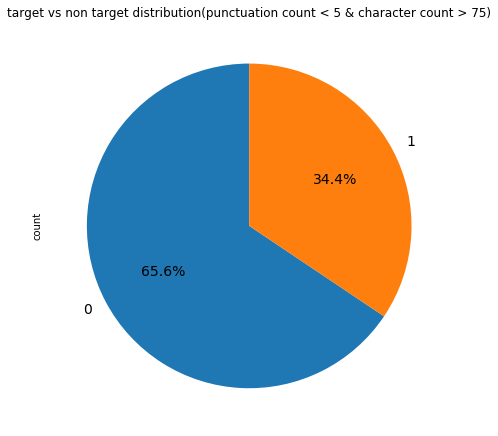

In [36]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(121, aspect='equal')
g = grouped_PC_CC.plot(kind='pie', y = 'count', ax = ax1, autopct='%1.1f%%', startangle=90, shadow=False, legend=False, fontsize=14)
ax1.set(title = 'target vs non target distribution(punctuation count < 5 & character count > 75)')

In [169]:
#a partir del scatter plot 'Character Count vs. Punctuation Count', podemos inferir que tweets con muchos 
#caracteres  poca puntuacion, también tienen mayor tendencia a ser non disaster

In [37]:
train_MWL_lt_5_and_CC_gt_75 = train_MWL_lt_5[train_MWL_lt_5.character_count > 75]
train_MWL_lt_5_and_CC_gt_75.head()
#train_MWL_lt_5.head()

,id,keyword,location,text,target,character_count,mean_word_length,punctuation_count
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,4.500000,2
11,17,NaN,NaN,Haha South Tampa is getting flooded hah- WAIT ...,1,129,3.814815,2
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76,4.923077,5
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0,122,4.857143,4
41,62,ablaze,milky way,Had an awesome time visiting the CFC head offi...,0,120,4.041667,3


In [38]:
grouped_MWL_CC=train_MWL_lt_5_and_CC_gt_75.groupby(['target']).agg(['count'])
grouped_MWL_CC = grouped_MWL_CC[('id','count')].to_frame()
grouped_MWL_CC.columns=['count']
grouped_MWL_CC.head()

,count
target,
0,966
1,372


[Text(0.5, 1.0, 'target vs non target distribution(mean word length < 5 & character count > 75)')]

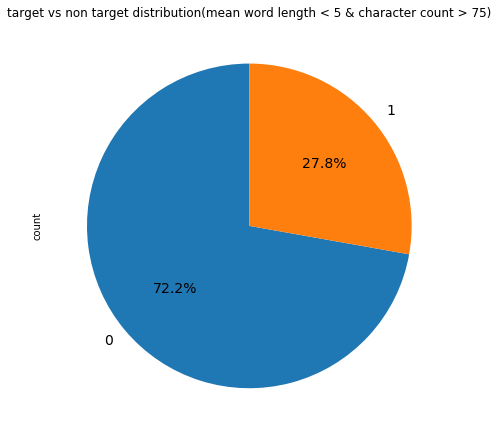

In [39]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(121, aspect='equal')
g = grouped_MWL_CC.plot(kind='pie', y = 'count', ax = ax1, autopct='%1.1f%%', startangle=90, shadow=False, legend=False, fontsize=14)
ax1.set(title = 'target vs non target distribution(mean word length < 5 & character count > 75)')

In [220]:
#resultados similares al plot anterior, se puede concluir que la cantidad de caracteres puede ser baja o alta, y
#los distribución entre target y non target se mantiene bastante firme